This python notebook will be dedicated to do some preliminary analyses on the datasets that we have.
Our initial goal is to look at data from the 2$\sigma$ competition:
https://www.kaggle.com/c/two-sigma-financial-news/data

Since that isn't available until around Aug. 5, we'll use data from Aaron7sun
https://www.kaggle.com/aaron7sun/stocknews/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import nltk
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA# to merge dataframes
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia = SIA()
def normalize_text(txt):
    # get list of stop words
    stop_words  = nltk.corpus.stopwords.words('english')
    ps          = PorterStemmer()
    # define the tokenizer function
    wpt         = nltk.WordPunctTokenizer()
    # tokenize the text; remove punctuation, useless words, etc.
    tokens      = wpt.tokenize(txt)
    txtFiltered = ' '.join([ps.stem(token) for token in tokens if token not in stop_words])
    
    return txtFiltered

In [3]:
# read in the datasets
combNews   = pd.read_csv('datasets/dailyStockNews/Combined_News_DJIA.csv',parse_dates=['Date']) # has top 25 headlines from reddit news file
djia       = pd.read_csv('datasets/dailyStockNews/DJIA_table.csv',parse_dates=['Date']) # stock data

# merge datasets
dfList     = [combNews, djia]
dfMerged = reduce(lambda  left,right: pd.merge(left,right,on=['Date'], how='outer'), dfList)
dfMerged.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top22,Top23,Top24,Top25,Open,High,Low,Close,Volume,Adj Close
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,b'Taliban wages war on humanitarian aid workers',"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688


In [4]:
dfMergedTwo = dfMerged.copy(deep = True)
header   = [i for i in dfMergedTwo.columns if 'Top' in i]
combinedTextSentiments = []
sentimentHeader = ['neg', 'pos', 'neu', 'compound']

dfMergedTwo.head()
# loop through dataframe
for i in range(len(dfMergedTwo)):
    combinedText = normalize_text(' '.join([str(dfMergedTwo.iloc[i][k]) for k in header]))
    combinedTextSentiments.append([sia.polarity_scores(combinedText)[m] for m in sentimentHeader])
    
# convert the sentiment data into a df
sentimentDf = pd.DataFrame(data=combinedTextSentiments, columns=sentimentHeader)
dfMergedSentiment = pd.concat([dfMergedTwo, sentimentDf], axis=1)

In [5]:
dfMergedSentiment.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Open,High,Low,Close,Volume,Adj Close,neg,pos,neu,compound
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,0.254,0.045,0.701,-0.9971
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,0.240,0.060,0.699,-0.9912
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,0.202,0.031,0.767,-0.9950
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,0.146,0.056,0.798,-0.9619
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree to missle defense deal. ...,"b'Will the Russians conquer Tblisi? Bet on it,...",...,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,0.199,0.074,0.728,-0.9865


In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Aummul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# This is some preliminary time series analysis:
# Basically for trying to combine sentiments with long-term trends, combine SAME day sentiments with time series information. (Have not tried sentiments of previous day, maybe better)

# Data Preprocessing

# Add time series features:

In [7]:
import itertools
import statsmodels.api as sm
features = ['pos','neg','neu','compound']
Column = ['Date','Label','Open','Close','pos','neg','neu','compound']
Djia = dfMergedSentiment[Column]
Djia.insert(len(Djia.columns),'Change',Djia['Close']-Djia['Open'])
Data_Regression = Djia[360:].copy()
variables = ['pos','compound']
variables.append('Pre1DayAvg')
variables.append('Pre2DayAvg')
#variables.append('Pre4DayAvg')
#variables.append('Pre6DayAvg')
#variables.append('Pre8DayAvg')
#variables.append('Pre10DayAvg')
#variables.append('Pre15DayAvg')
variables.append('Pre30DayAvg')
variables.append('Pre60DayAvg')
#variables.append('Pre120DayAvg')
#variables.append('Pre240DayAvg')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
accu = 0
for k in np.arange(61,62):
    Data_Regression = Djia[240:].copy()
# For using yesterday's features
#for i in features:
#    Data_Regression[i] = Djia.loc[len(Djia.index)-len(Data_Regression.index)-1:len(Djia.index)-2,i].values
# Add time series features
    Data_Regression.insert(len(Djia.columns)-1,'Pre1DayAvg',0.01)
    for i in Data_Regression.index.values:
        Data_Regression.at[i,'Pre1DayAvg']=Djia['Change'][i-1:i].mean()
    
    Data_Regression.insert(len(Djia.columns)-1,'Pre2DayAvg',0.01)
    for i in Data_Regression.index.values:
        Data_Regression.at[i,'Pre2DayAvg']=Djia['Change'][i-2:i-1].mean()
    '''
    Data_Regression.insert(len(Djia.columns)-1,'Pre4DayAvg',0.01)
    for i in Data_Regression.index.values:
        Data_Regression.at[i,'Pre4DayAvg']=Djia['Change'][i-4:i-2].mean()
            
    Data_Regression.insert(len(Djia.columns)-1,'Pre6DayAvg',0.01)
    for i in Data_Regression.index.values:
        Data_Regression.at[i,'Pre6DayAvg']=Djia['Change'][i-8:i-4].mean()
    '''    
    #Data_Regression.insert(len(Djia.columns)-1,'Pre8DayAvg',0.01)
    #for i in Data_Regression.index.values:
    #    Data_Regression.at[i,'Pre8DayAvg']=Djia['Change'][i-8:i-6].mean()
            
    #Data_Regression.insert(len(Djia.columns)-1,'Pre10DayAvg',0.01)
    #for i in Data_Regression.index.values:
    #    Data_Regression.at[i,'Pre10DayAvg']=Djia['Change'][i-10:i-8].mean()

    #Data_Regression.insert(len(Djia.columns)-1,'Pre15DayAvg',0.01)
    #for i in Data_Regression.index.values:
    #    Data_Regression.at[i,'Pre15DayAvg']=Djia['Change'][i-15:i-10].mean()
            
    Data_Regression.insert(len(Djia.columns)-1,'Pre30DayAvg',0.01)
    for i in Data_Regression.index.values:
        Data_Regression.at[i,'Pre30DayAvg']=Djia['Change'][i-47:i-8].mean()
            
    Data_Regression.insert(len(Djia.columns)-1,'Pre60DayAvg',0.01)
    for i in Data_Regression.index.values:
        Data_Regression.at[i,'Pre60DayAvg']=Djia['Change'][i-k:i-47].mean()
    '''        
    Data_Regression.insert(len(Djia.columns)-1,'Pre120DayAvg',0.01)
    for i in Data_Regression.index.values:
        Data_Regression.at[i,'Pre120DayAvg']=Djia['Change'][i-120:i-k].mean()
        
    Data_Regression.insert(len(Djia.columns)-1,'Pre240DayAvg',0.01)
    for i in Data_Regression.index.values:
        Data_Regression.at[i,'Pre240DayAvg']=Djia['Change'][i-240:i-120].mean()
    '''
            
    
    X = Data_Regression[variables] 
    y = Data_Regression['Label']
# Make training set
    X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.1, shuffle=False, stratify = None)
    logreg = LogisticRegression()

# fit model
    logreg.fit(X_train,y_train)
    y_pred = logreg.predict(X_test)
    accu_temp = metrics.accuracy_score(y_test, y_pred)
    if accu_temp>=accu:
        print(k,"Accuracy:",accu_temp)
        accu = accu_temp

61 Accuracy: 0.5942857142857143


In [8]:
print(logreg.coef_)

[[-0.02528433 -0.1355989  -0.00048736  0.00016161  0.00070154 -0.00369408]]


In [9]:
Data_Regression.head()

,Date,Label,Open,Close,pos,neg,neu,compound,Pre60DayAvg,Pre30DayAvg,Pre2DayAvg,Pre1DayAvg,Change
240,2009-07-23,1,8882.309570,9069.290039,0.025,0.208,0.767,-0.9951,19.507184,-4.215507,67.790039,-31.129882,186.980469
241,2009-07-24,1,9066.110352,9093.240234,0.033,0.170,0.798,-0.9940,18.881452,2.008589,-31.129882,186.980469,27.129882
242,2009-07-27,1,9093.089844,9108.509766,0.107,0.245,0.647,-0.9951,36.062848,-3.268580,186.980469,27.129882,15.419922
243,2009-07-28,0,9106.919922,9096.719727,0.097,0.272,0.631,-0.9979,22.130650,3.908103,27.129882,15.419922,-10.200195
244,2009-07-29,0,9092.339844,9070.719727,0.063,0.201,0.736,-0.9967,20.031320,7.727088,15.419922,-10.200195,-21.620117


# LR Results

# Below is for finding best time series parameters

In [285]:
variables = features.copy()
variables.append('Pre1DayAvg')
variables.append('Pre18DayAvg')
variables.append('Pre43DayAvg')
variables.append('Pre92DayAvg')
#variables.append('Pre169DayAvg')
#variables.append('Pre360DayAvg')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
accu_max = 0
for k in np.arange(44,100):
    for j in np.arange(k+1,k+2):
        Data_Regression = Djia[360:].copy()
        Data_Regression.insert(len(Djia.columns)-1,'Pre1DayAvg',0.01)
        for i in Data_Regression.index.values:
            Data_Regression.at[i,'Pre1DayAvg']=Djia['Change'][i-1:i].mean()
    
        Data_Regression.insert(len(Djia.columns)-1,'Pre18DayAvg',0.01)
        for i in Data_Regression.index.values:
            Data_Regression.at[i,'Pre18DayAvg']=Djia['Change'][i-18:i-1].mean()

        Data_Regression.insert(len(Djia.columns)-1,'Pre43DayAvg',0.01)
        for i in Data_Regression.index.values:
            Data_Regression.at[i,'Pre43DayAvg']=Djia['Change'][i-43:i-18].mean()
    
        Data_Regression.insert(len(Djia.columns)-1,'Pre92DayAvg',0.01)
        for i in Data_Regression.index.values:
            Data_Regression.at[i,'Pre92DayAvg']=Djia['Change'][i-k:i-43].mean()

        #Data_Regression.insert(len(Djia.columns)-1,'Pre169DayAvg',0.01)
        #for i in Data_Regression.index.values:
        #    Data_Regression.at[i,'Pre169DayAvg']=Djia['Change'][i-j:i-k].mean()
        
    #Data_Regression.insert(len(Djia.columns)-1,'Pre360DayAvg',0.01)
    #for i in Data_Regression.index.values:
    #    Data_Regression.at[i,'Pre360DayAvg']=Djia['Change'][i-k:i-169].mean()

        X = Data_Regression[variables] 
        y = Data_Regression['Label']

# Make training set

        X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.1, shuffle=False, stratify = None)

# set the model


        logreg = LogisticRegression()

# fit model
        logreg.fit(X_train,y_train)
        y_pred = logreg.predict(X_test)
        accu = metrics.accuracy_score(y_test, y_pred)
        if accu >= accu_max:
            accu_max = accu
            print(k,j,"Accuracy:",accu)


44 45 Accuracy: 0.5460122699386503
45 46 Accuracy: 0.5705521472392638
65 66 Accuracy: 0.5705521472392638
66 67 Accuracy: 0.5705521472392638
78 79 Accuracy: 0.5828220858895705
79 80 Accuracy: 0.5828220858895705


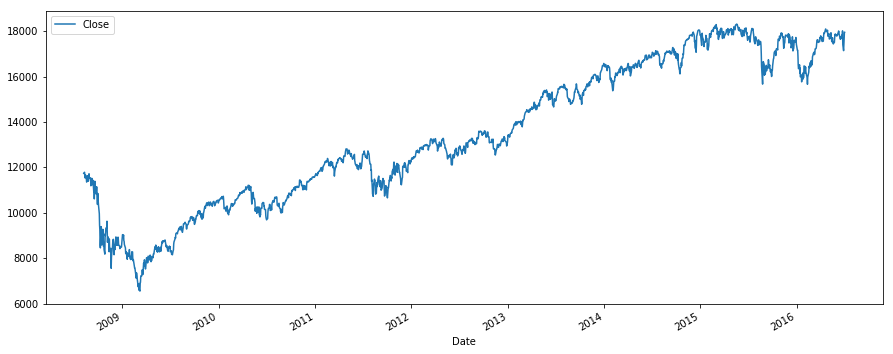

In [146]:
Djia = Djia.set_index('Date')
Djia.plot(y='Close',figsize=(15, 6))
plt.show()

# Write a rolling forecast code for test set:
# The model parameters are trained by training data + future observed data, and forecast is made using future observed data
# The model is updated at each future observation
# Prediction into many steps later is challenging due to butterfly effect

In [31]:
# set the model knn


from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=14)
classifier.fit(X_train, y_train)
y_pred_knn = classifier.predict(X_test)



In [36]:
# set the model random forest
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 10, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

y_pred_rr = rf.predict(X_test)

In [14]:
#logistic regression
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc


0.5728429058484132

In [34]:
#knn
false_positive_rate_knn, true_positive_rate_knn, thresholds_knn = roc_curve(y_test, y_pred_knn)
roc_auc_knn = auc(false_positive_rate_knn, true_positive_rate_knn)
roc_auc_knn

0.5378311041174928

In [37]:
#rr
false_positive_rate_rr, true_positive_rate_rr, thresholds_rr = roc_curve(y_test, y_pred_rr)
roc_auc_rr = auc(false_positive_rate_rr, true_positive_rate_rr)
roc_auc_rr

0.5505507474429584

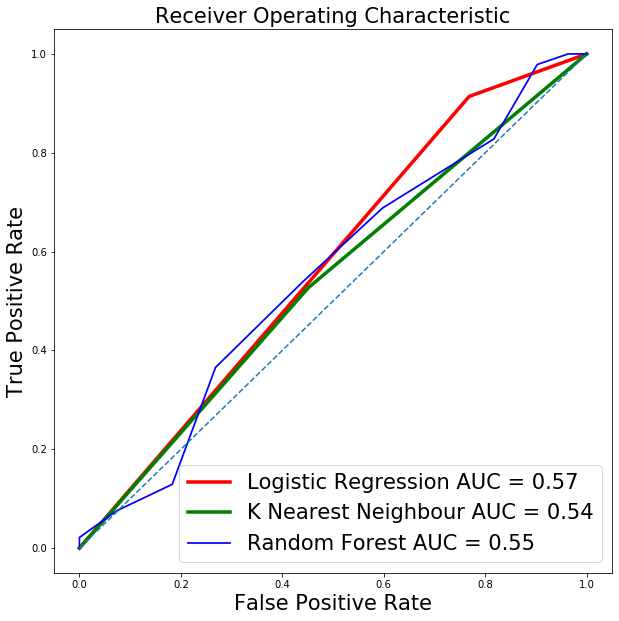

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic', fontsize=21)
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'Logistic Regression AUC = %0.2f' % roc_auc, linewidth=3.5)
plt.plot(false_positive_rate_knn,true_positive_rate_knn, color='green',label = 'K Nearest Neighbour AUC = %0.2f' % roc_auc_knn, linewidth=3.5)
plt.plot(false_positive_rate_rr,true_positive_rate_rr, color='blue',label = 'Random Forest AUC = %0.2f' % roc_auc_rr, linewidth=1.75)
plt.legend(loc = 'lower right', prop={'size': 21})
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate', fontsize=21)
plt.xlabel('False Positive Rate', fontsize=21)
plt.savefig('ROC.png')